# Stochastic Scheduling and MDPs
L'obiettivo dell'esercizio è di implementare un sistema di scheduling stocastico e utilizzare MDP (Markov Decision Process) per modellarlo. In particolare, l'esercizio prevede diversi sotto-punti intermedi:
1. Progettazione di un esempio di stochastic scheduling, che abbia: almeno 3 task, vincoli temporali tra le task, intervalli di durata per ogni task e una distribuzione di probabilità sulle durate;
2. Implementazione di un sistema stocastico -> implemento allora la funzione step(task);
3. Estrazione dell'MDP attraverso la libreria Automata Learning;
4. Implementare una strategia phi, che partendo da ogni stato, permettee di arrivare ad uno stato SUCCESS oppure FAIL -> capiamo, allora, che deve esserci almeno un path che arriva a SUCCESS;
5. Generare 1000 tracce usando phi;
6. Convertire le tracce e applicare l'algoritmo di process discovery.

In [62]:
# Installo i pacchetti
from importlib.util import find_spec
import sys
import subprocess

# Solo i pacchetti necessari
required = ['aalpy', 'pm4py', 'networkx', 'matplotlib']

for pkg in required:
    if not find_spec(pkg):
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

In [2]:
from aalpy.base import SUL
from random import choices
from typing import Dict, List, Tuple, Optional, Any

class ScheduleSUL(SUL): # Definisco questa classe per modellare il sistema stocastico
    def __init__(   # Per inizializzare:
        self,
        tasks: List[str],   # lista task;
        constraints: List[Tuple[str, str, str, str, Tuple[int, int]]],  # vincoli temporali
        durations: Dict[str, Tuple[int, int]],  # intervalli di durata
        probabilities: Dict[str, List[float]]   # lista delle probabilità
    ):
        super().__init__()
        self.tasks = tasks
        self.constraints = constraints
        self.durations = durations
        self.probabilities = probabilities
        self.plan: Dict[str, Tuple[int, int]] = {}  # per capire quali task sono stati già schedulati e l'intervallo di tempo in cui vengono eseguiti
        self.current_time = 0   # tempo globale del sistema

    def pre(self):  # resetta lo stato del sistema prima di ogni test
        self.plan.clear()
        self.current_time = 0

    def post(self): # resetta lo stato del sistema dopo di ogni test
        self.plan.clear()
        self.current_time = 0

    def step(self, task: Optional[str]) -> Any: # simula un passo del sistema, ricevendo in input un task
        if task is None:    # se il task è 'None', allora il metodo restituisce 0
            return 0

        if self._is_inconsistent(): # se il piano non rispetta i vincoli, allora si ritorna un errore
            return "fail"

        if set(self.plan) == set(self.tasks):   # contrario di sopra
            return "success"

        if task not in self.plan:   # se il task non è stato ancora pianificato (nel senso che non ha un inizio e una fine), allora:
            duration = choices(
                range(self.durations[task][0], self.durations[task][1] + 1),    # sceglie casualmente una durata
                weights=self.probabilities[task]
            )[0]
            self.plan[task] = (self.current_time, self.current_time + duration) # assegna al task un intervallo di tempo

            # mi tocca ricontrollare la correttezza dei vincoli
            if self._is_inconsistent():
                return "fail"
            if set(self.plan) == set(self.tasks):
                return "success"

            self.current_time += 1
            return 0    # perchè il task non è ancora terminato

        # Se il task era già pianificato, allora controllo se 'current_time' ha raggiunto la fine del task -> se ritorna 1, allora ha finito, altrimenti vuol dire che è ancora in esecuzione
        start, end = self.plan[task]
        finished = self.current_time >= end
        self.current_time += 1
        return 1 if finished else 0

    def _is_inconsistent(self) -> bool: # controllo se è stato violato un vincolo temporale -> faccio time2 - time1 e se la differenza è nell'intervallo, allora i vincoli sono rispettati
        for t1, op1, t2, op2, (low, high) in self.constraints:
            if t1 in self.plan and t2 in self.plan:
                time1 = self.plan[t1][0] if op1 == 'b' else self.plan[t1][1]
                time2 = self.plan[t2][0] if op2 == 'b' else self.plan[t2][1]
                if not (low <= (time2 - time1) <= high):
                    return True
        return False

In [4]:
tasks = ['T1', 'T2', 'T3']

durations = {
    'T1': (5, 10),
    'T2': (3, 6),
    'T3': (2, 4)
}

probabilities = {
    'T1': [0.1, 0.15, 0.2, 0.2, 0.2, 0.15],
    'T2': [0.2, 0.3, 0.3, 0.2],
    'T3': [0.4, 0.4, 0.2]
}

constraints = [
    ('T1', 'e', 'T2', 'b', (0, 3)),
    ('T2', 'e', 'T3', 'b', (1, 4))
]

A questo punto, abbiamo progettato il sistema stochastico e implementato la funzione step(task) e di conseguenza, ci tocca realizzare l'apprendimento di un MDP.

Hypothesis: 1: 1 states.
Hypothesis: 2: 6 states.
Hypothesis: 3: 8 states.
Hypothesis: 4: 9 states.
Hypothesis: 5: 13 states.
Hypothesis: 6: 13 states.
Hypothesis: 7: 14 states.
Hypothesis: 8: 15 states.
Hypothesis: 9: 16 states.
Hypothesis: 10: 16 states.
Hypothesis: 11: 16 states.
Hypothesis: 12: 15 states.
Hypothesis: 13: 15 states.
Hypothesis: 14: 16 states.
Hypothesis: 15: 16 states.
Hypothesis: 16: 19 states.
Hypothesis: 17: 23 states.
Hypothesis: 18: 24 states.
Hypothesis: 19: 25 states.
Hypothesis: 20: 25 states.
Hypothesis: 21: 25 states.
Hypothesis: 22: 27 states.
Hypothesis: 23: 30 states.
Hypothesis: 24: 32 states.
Hypothesis: 25: 33 states.
Hypothesis: 26: 34 states.
Hypothesis: 27: 35 states.
Hypothesis: 28: 36 states.
Hypothesis: 29: 38 states.
Hypothesis: 30: 38 states.
Unambiguous rows: 82.76%; 120 out of 145
Hypothesis: 31: 38 states.
Hypothesis: 32: 39 states.
Hypothesis: 33: 39 states.
Hypothesis: 34: 40 states.
Hypothesis: 35: 40 states.
Unambiguous rows: 84.97%; 1

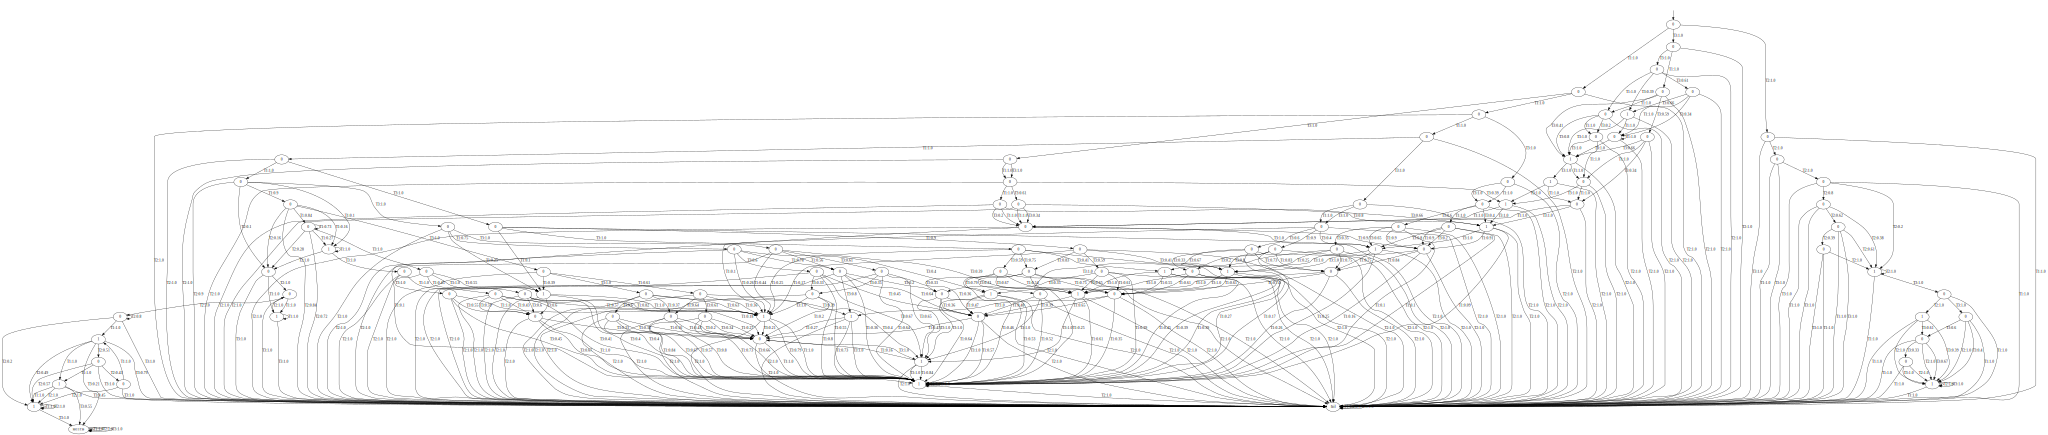

In [68]:
from aalpy.oracles import RandomWalkEqOracle
from aalpy.learning_algs import run_stochastic_Lstar
from aalpy.utils import visualize_automaton
from IPython.display import SVG, display
import time

# 1) Creo il simulatore del sistema (sul)
sul = ScheduleSUL(tasks, constraints, durations, probabilities) # rappresenta: quali task ci sono; quali sono i vincoli; quanto durano i task e con quale probabilità

# 2) Creo un oracolo di equivalenza (esplora il sistema facendo scelte casuali tra i task)
eq_oracle = RandomWalkEqOracle(tasks, sul)

# 3) Avvio l’algoritmo di apprendimento
learned_mdp = run_stochastic_Lstar(
    input_alphabet=tasks,   # task che il sistema può eseguire
    sul=sul,    # simulatore che fornisce le risposte
    eq_oracle=eq_oracle,
    automaton_type='mdp',
    n_c=5   # numero di campioni -> lo uso per stimare le probabilià di transizione nell'MDP (es: parto dallo stato 'q' ed eseguo 5 volte T1 -> 3 volte vado in 'q1' e 2 volte in 'q2'. Allora stimo che: 3/5 delle volte vado in 'q1' e 2/5 vado in 'q2')
)

learned_mdp.visualize(path='LearnedModel', file_type='svg') # Visualizzo l'MDP

# Mostro il grafico
import time
from IPython.display import SVG, display
time.sleep(1)
display(SVG(filename='LearnedModel.svg'))

In [69]:
from aalpy.utils import save_automaton_to_file
import time
# Salvo il modello
save_automaton_to_file(learned_mdp, path="LearnedModel", file_type="dot")
time.sleep(1)

Model saved to LearnedModel.dot.


In [70]:
# Converto il modello MDP in un grafo NetworkX
import pydot
import networkx as nx

(dot_graph,) = pydot.graph_from_dot_file("LearnedModel.dot")    # leggo il file DOT
graph = nx.DiGraph()    # creo il grafo diretto

# Aggiungo i nodi
for node in dot_graph.get_nodes():
    name = node.get_name().strip('"')
    if name == "__start0":
        continue
    label = node.get_attributes().get("label", name).strip('"')
    graph.add_node(name, label=label)

# Aggiungo gli archi
for edge in dot_graph.get_edges():
    src = edge.get_source().strip('"')
    dst = edge.get_destination().strip('"')
    label = edge.get_attributes().get("label", "").strip('"')

    if ':' in label:
        action, probability = label.split(':')
        graph.add_edge(src, dst,
                       label=label,
                       action=action.strip(),
                       probability=float(probability.strip()))
    else:
        graph.add_edge(src, dst, label=label)

print("Grafo caricato con", len(graph.nodes), "nodi e", len(graph.edges), "archi.")

Grafo caricato con 106 nodi e 374 archi.


In [71]:
print("Label dei nodi nel grafo:")  # Ho usato queste istruzioni per vedere le etichette dei nodi, in quanto alcune volte avevo dei problemi con i grafi che non avevano un nodo etichettato a Success e di conseguenza, le istruzioni successive non trovavano il percorso più breve e ottenevo errore.
for node_id, attrs in graph.nodes(data=True):
    print(f"{node_id}: {attrs.get('label')}")

Label dei nodi nel grafo:
s0: 0
s1: 0
s2: 0
s3: 0
s4: 0
s5: 0
s6: 0
s7: 0
s8: 0
s9: 0
s10: 0
s11: 0
s12: 0
s13: 0
s14: 1
s15: 0
s16: 0
s17: 0
s18: 0
s19: 0
s20: 0
s21: 0
s22: 0
s23: 0
s24: 0
s25: 0
s26: 0
s27: 0
s28: 0
s29: 1
s30: 1
s31: 0
s32: 1
s33: 0
s34: 0
s35: 0
s36: 0
s37: 0
s38: 0
s39: 1
s40: 0
s41: 0
s42: 0
s43: 1
s44: 1
s45: 0
s46: 1
s47: 0
s48: 1
s49: 0
s50: 0
s51: 0
s52: 1
s53: 0
s54: 1
s55: 1
s56: 1
s57: 0
s58: 0
s59: 0
s60: 0
s61: 1
s62: 0
s63: 1
s64: 0
s65: 0
s66: 0
s67: 0
s68: 0
s69: 0
s70: 0
s71: 0
s72: 0
s73: fail
s74: 0
s75: 1
s76: 0
s77: 0
s78: 0
s79: 0
s80: 0
s81: 1
s82: 0
s83: 0
s84: 0
s85: 0
s86: 1
s87: 0
s88: 0
s89: 0
s90: 0
s91: 1
s92: 0
s93: 1
s94: 0
s95: 0
s96: 0
s97: 0
s98: 1
s99: 0
s100: 1
s101: 0
s102: 1
s103: 0
s104: success
__start0: None


In [73]:
initial_state = "s0"    # stato iniziale
success_state = None

for node_id, attributes in graph.nodes(data=True):  # scorro tutti i nodi e controllo la label dei nodi
    raw_label = attributes.get("label", "")
    clean_label = raw_label.strip('"').strip()
    if clean_label.lower() == "success":    # se trovo la label 'success', allora salvo l'ID del nodo e smetto di cercare
        success_state = node_id
        break

shortest_path = nx.shortest_path(graph, source=initial_state, target=success_state) # uso la funzione per calcolare il path più breve
print("Cammino più breve:", shortest_path)

Cammino più breve: ['s0', 's1', 's2', 's3', 's4', 's9', 's77', 's85', 's89', 's93', 's104']


Adesso devo definire la strategia phi, che dato uno stato 'source' (ovvero lo stato corrente dell'MDP) ritorna quale task eseguire per cercare di arrivare allo stato SUCCESS.

In [75]:
def phi(source):
    # Se source è nel path più breve
    if source in shortest_path:
        idx = shortest_path.index(source)   # recupero l'indice dello stato corrente e se non è l'ultimo nodo, allora passo al nodo successivo e faccio il task relativo all'arco souce -> next_node

        if idx < len(shortest_path) - 1:
            next_node = shortest_path[idx + 1]
            # Ritorna l'azione dell'arco da source -> next_node
            return graph[source][next_node]['action']

    # Se source non è nel path più breve -> allora guardo tutti i nodi uscenti da source e scelgo l'arco con probabilità maggiore
    outgoing = list(graph.out_edges(source, data=True))
    if not outgoing:    # se non ci sono archi uscenti, allora source è un nodo terminale
        return None

    best = max(outgoing, key=lambda x: x[2].get('probability', 0))  # scelto l'arco con probabilità maggiore
    return best[2].get('action')

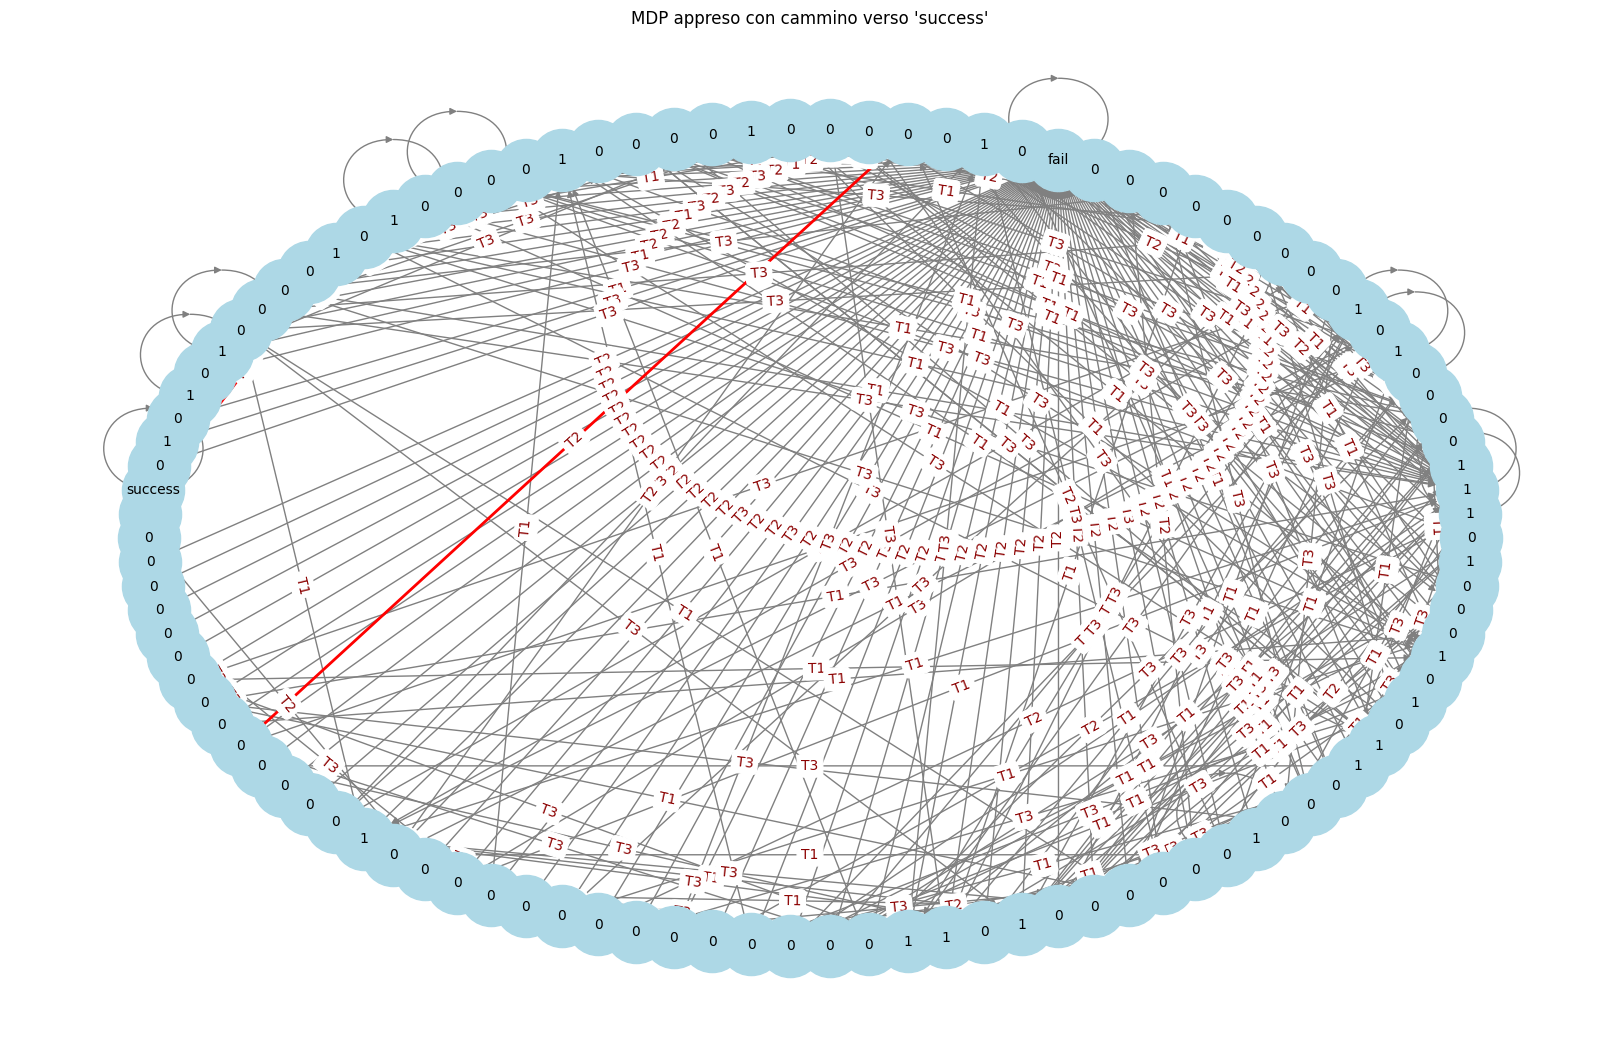

In [76]:
import matplotlib.pyplot as plt

pos = nx.shell_layout(graph)
plt.figure(figsize=(16, 10))

# Disegna nodi con etichette
node_labels = nx.get_node_attributes(graph, "label")
nx.draw(graph, pos, labels=node_labels, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)

# Evidenzia il cammino più breve in rosso
best_path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
nx.draw_networkx_edges(graph, pos, edgelist=best_path_edges, edge_color="red", width=2)

# Etichette delle azioni sugli archi
edge_labels = nx.get_edge_attributes(graph, "action")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color="darkred", font_size=10)

plt.title("MDP appreso con cammino verso 'success'")
plt.axis("off")
plt.show()

In [77]:
from random import choices

def generate_trace(graph, phi_func):    # Funzione per generare una singola traccia seguendo la strategia phi
    current = 's0'  # Stato iniziale nel grafo
    trace = [graph.nodes[current].get("label", current)]  # L'idea è di aggiungere alla traccia le label degli stati -> parto allora con la label di s0

    # continuo a ciclare fino a quando non raggiungo SUCCESS oppure FAIL
    while graph.nodes[current].get("label", "").replace('"', '') not in {"success", "fail"}:
        action = phi_func(current)  # applico phi per capire quale azione devo eseguire nello stato corrente
        trace.append(action)

        # Filtro gli archi in uscita compatibili con l'azione scelta
        edges = [(v, d) for u, v, d in graph.out_edges(current, data=True) if d.get("action") == action]
        if not edges:   # se non ci sono archi compatibili, allora ho un errore
            raise ValueError(f"Nessun arco da {current} con azione '{action}'")

        # Scelgo il prossimo stato in base alle probabilità
        targets, probs = zip(*[(v, d["probability"]) for v, d in edges])
        next_state = choices(targets, weights=probs)[0]
        current = next_state    # passo allo stato successivo e salvo la label
        trace.append(graph.nodes[current].get("label", current))

    return trace

In [79]:
# Genero 1000 tracce seguendo la strategia φ
traces = [generate_trace(graph, phi) for _ in range(1000)]
for i, t in enumerate(traces[:5]):  # stampo solo le prime 5 righe
    print(f"Traccia {i+1}: {t}")

Traccia 1: ['0', 'T1', '0', 'T1', '0', 'T1', '0', 'T1', '0', 'T1', '0', 'T2', '0', 'T2', '0', 'T2', '0', 'T1', '1', 'T3', 'fail']
Traccia 2: ['0', 'T1', '0', 'T1', '0', 'T1', '0', 'T1', '0', 'T1', '0', 'T2', '0', 'T2', '0', 'T2', '0', 'T1', '1', 'T3', 'success']
Traccia 3: ['0', 'T1', '0', 'T1', '0', 'T1', '0', 'T1', '0', 'T1', '0', 'T2', 'fail']
Traccia 4: ['0', 'T1', '0', 'T1', '0', 'T1', '0', 'T1', '0', 'T1', '0', 'T2', 'fail']
Traccia 5: ['0', 'T1', '0', 'T1', '0', 'T1', '0', 'T1', '0', 'T1', '0', 'T2', 'fail']


In [80]:
import pm4py
from pm4py.objects.log.obj import EventLog, Trace, Event

event_log = EventLog()
for trace in traces:
    pm_trace = Trace()
    for idx, activity in enumerate(trace):
        event = Event({
            'concept:name': activity.replace('"', ''),
            'time:timestamp': idx
        })
        pm_trace.append(event)
    event_log.append(pm_trace)

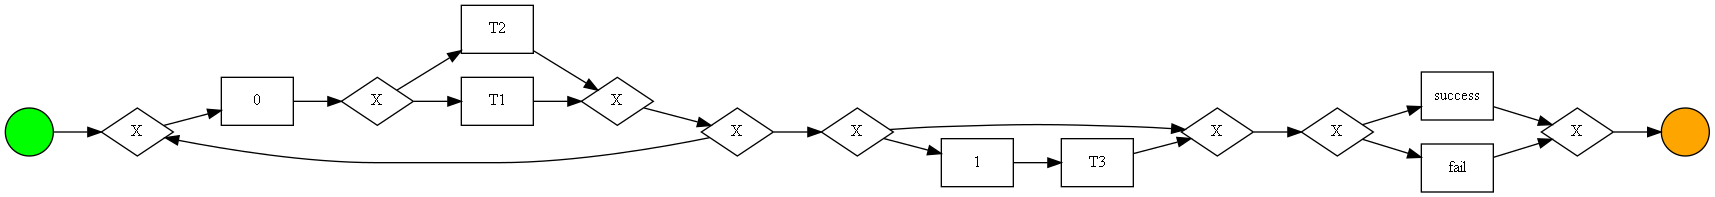

In [81]:
# Creo un albero
process_tree = pm4py.discover_process_tree_inductive(event_log)
bpmn_model = pm4py.convert_to_bpmn(process_tree)    # Converto in modello BPMN
pm4py.view_bpmn(bpmn_model)